# **1. Data Set Information:**
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


### **1.1 Attribute Information:**
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
   - 1 = the patient survived 5 years or longer       
   - 2 = the patient died within 5 year

### **1.2 DataSet Information:**
The dataset comprises of **306 observations** and 4 columns.

## 2. Load Packages & Data

In [1]:
#Import required packages
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [2]:
#import breast cancer survival dataset
cancer_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv')
cancer_df.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## 3. Data Profiling

* We will understand the data and try to understand the types of variables we are dealing with.
* Which variables will be transformed in some way before it can be analyzed.




In [3]:
cancer_df.dtypes

Age                   int64
Years_of_operation    int64
Pos_axillary_nodes    int64
Status                int64
dtype: object

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [5]:
cancer_df.describe(include='all')

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
pre_profile = pandas_profiling.ProfileReport(cancer_df)
pre_profile.to_file(outputfile="myoutputfile.html")

## 4. Observations

1.   There are no missing values.
2.   Age data is within a realistic range.
3.   No outliers present.
3.   Survival status is integer, it has to be converetd to categorical data to give more meaning.



## 5. Processing of Data

### 5.1 Standardize all column headers to lower case

In [7]:
cancer_df.columns = map(str.lower, cancer_df.columns)                                  # map() function returns a list of results after applying the given function
                                                                                 # to each item of a given iterable.
cancer_df.dtypes                                                                # Confirm that all variable names are now lower case

age                   int64
years_of_operation    int64
pos_axillary_nodes    int64
status                int64
dtype: object

In [8]:
# Find the unique values in Status column.
cancer_df['status'].unique()

array([1, 2], dtype=int64)

In [9]:
# Create a function to replace 1 with Yes & 2 With No.
def survived_status(status):
  if status == 1:
    return 'Yes'
  else:
    return 'No'


In [10]:
#Apply this function to the data set

cancer_df['survived_after_5_years']=cancer_df['status'].apply(survived_status)

cancer_df.head()

,age,years_of_operation,pos_axillary_nodes,status,survived_after_5_years
0,30,64,1,1,Yes
1,30,62,3,1,Yes
2,30,65,0,1,Yes
3,31,59,2,1,Yes
4,31,65,4,1,Yes


In [11]:
# we will drop status column.
cancer_df.drop('status', axis=1, inplace=True)

In [12]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                       306 non-null int64
years_of_operation        306 non-null int64
pos_axillary_nodes        306 non-null int64
survived_after_5_years    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [13]:
print("Frequency table for survived after 5 years")
print(cancer_df.iloc[:,-1].value_counts())
print("-"*50)
print(cancer_df.iloc[:,-1].value_counts(normalize = True))

Frequency table for survived after 5 years
Yes    225
No      81
Name: survived_after_5_years, dtype: int64
--------------------------------------------------
Yes    0.735294
No     0.264706
Name: survived_after_5_years, dtype: float64


In [14]:
cancer_df.describe(include='all')

,age,years_of_operation,pos_axillary_nodes,survived_after_5_years
count,306.000000,306.000000,306.000000,306
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Yes
freq,NaN,NaN,NaN,225
mean,52.457516,62.852941,4.026144,NaN
std,10.803452,3.249405,7.189654,NaN
min,30.000000,58.000000,0.000000,NaN
25%,44.000000,60.000000,0.000000,NaN
50%,52.000000,63.000000,1.000000,NaN
75%,60.750000,65.750000,4.000000,NaN


In [15]:
cancer_df['pos_axillary_nodes'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: pos_axillary_nodes, dtype: int64

### 5.2 Post processing observations


1.   Sample size is very small, only 306 observations.
2.   Their are no Outliers.
3.   Out of 306 patients, 225 survived and 81 did not.
4.   This dataset is imbalanced.


## 6. Questions

### 6.1 How many survived after 5 years?

Text(0.5, 1.0, 'Count plot for survived after 5 years')

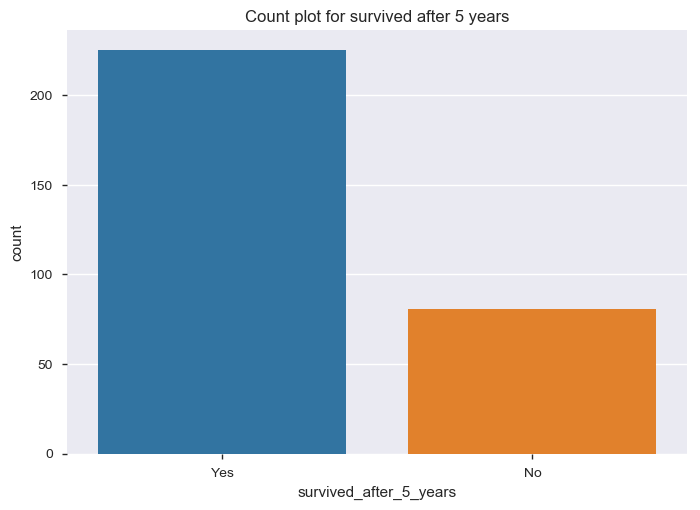

In [16]:
sns.countplot(x='survived_after_5_years', data=cancer_df).set_title('Count plot for survived after 5 years')

We can see that most of the **patients survived** more than 5 years.

To know the exact count -

In [17]:
cancer_df.groupby('survived_after_5_years')['survived_after_5_years'].count()

survived_after_5_years
No      81
Yes    225
Name: survived_after_5_years, dtype: int64

Notice that 225 Survived more than 5 years where as only 81 survived for months.

### 6.2 Survival rate based on Age group 

All the paitents are above 30 years of age. So females after 30 years has more risk of getting Breast Cancer.

In [18]:
cancer_df['age_group'] = pd.cut(cancer_df['age'],
                         [30,40,50,60,70,80,90],
                         labels=['30-40','40-50','50-60','60-70','70-80','80+'], include_lowest=True)
cancer_df.groupby(['age_group'])['age_group'].count()

age_group
30-40    43
40-50    93
50-60    93
60-70    63
70-80    13
80+       1
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Age Group vs survived more than 5 years')

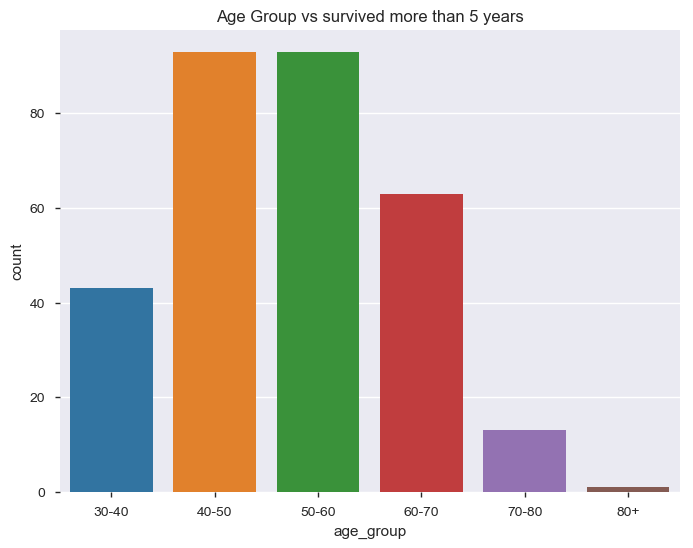

In [19]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = cancer_df,x = 'age_group')
plt.title('Age Group vs survived more than 5 years')

In [20]:
cancer_df.groupby(['age_group','survived_after_5_years'])['survived_after_5_years'].count()

age_group  survived_after_5_years
30-40      No                         4
           Yes                       39
40-50      No                        29
           Yes                       64
50-60      No                        26
           Yes                       67
60-70      No                        18
           Yes                       45
70-80      No                         3
           Yes                       10
80+        No                         1
Name: survived_after_5_years, dtype: int64

It can be infered from the above plot that the chances of having Breast Cancer increases with Age.

Most affected females are between 40 & 60 age.

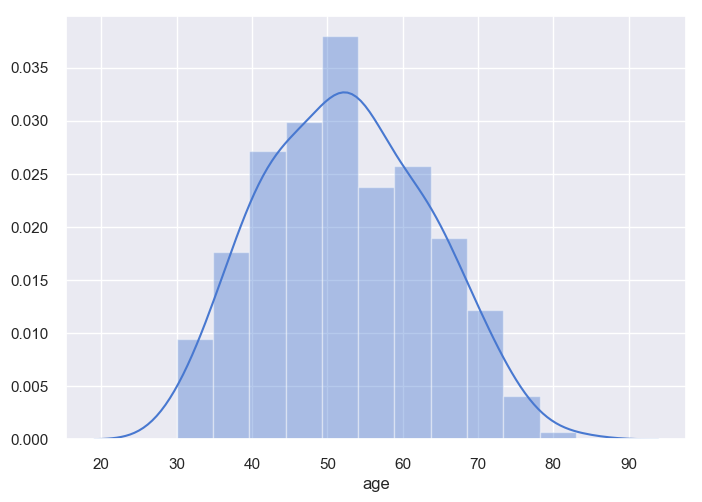

In [21]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))

sns.distplot(cancer_df['age'])

Text(0.5, 1.0, 'Count plot for survived after 5 years')

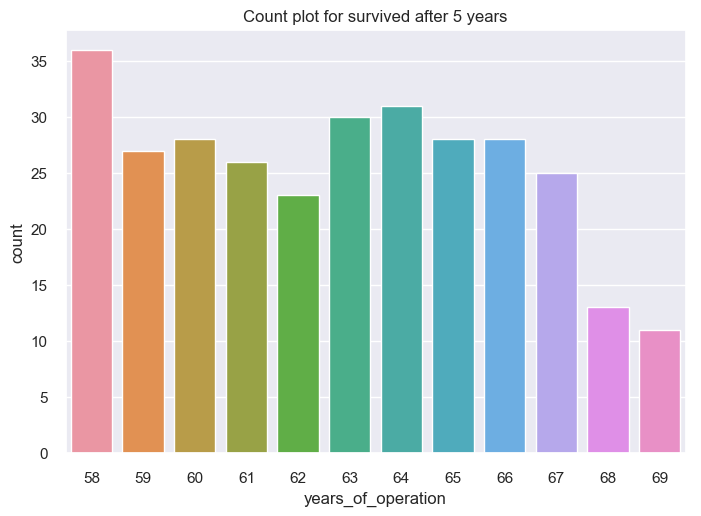

In [22]:
#Most year of treatment
sns.countplot(x='years_of_operation', data=cancer_df).set_title('Count plot for survived after 5 years')

Text(0.5, 1.0, 'Count plot for survived after 5 years')

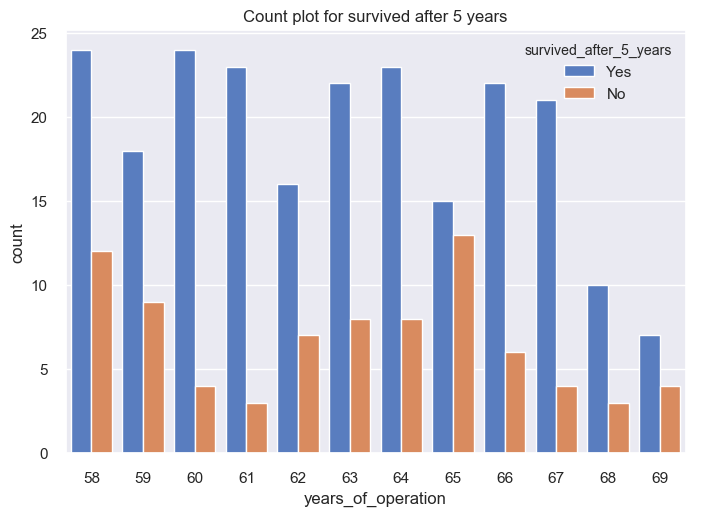

In [23]:
#Most year of treatment
sns.countplot(x='years_of_operation', data=cancer_df, hue='survived_after_5_years').set_title('Count plot for survived after 5 years')

#### Probability Density Function

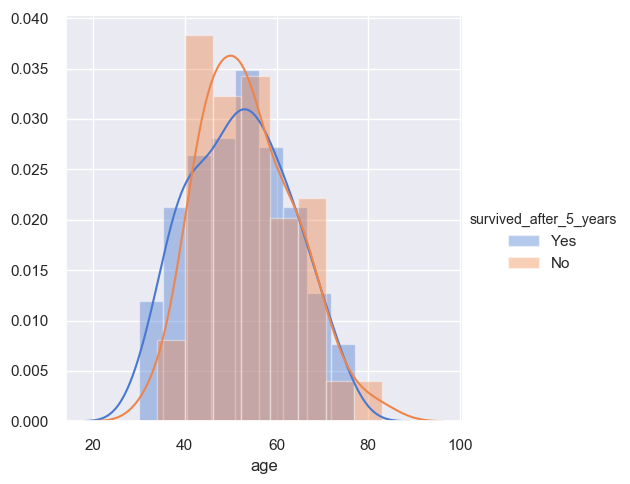

In [24]:
sns.FacetGrid(cancer_df,hue='survived_after_5_years',height = 5).map(sns.distplot,'age').add_legend()
plt.show()

#### Observations

1.   We can see that there is major overlapping, which states that survival chances are irrespective of patients age.
2.   We can assume that patients within age group 30-40 are more likely to survive and 40-60 are less likely to survive.


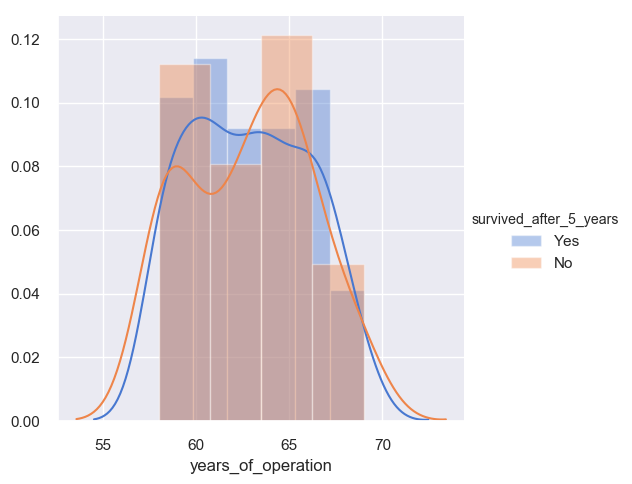

In [25]:
sns.FacetGrid(cancer_df,hue='survived_after_5_years',height = 5).map(sns.distplot,'years_of_operation').add_legend()
plt.show()

#### Observations
1.   There is major overlapping observed. This graph only tells how many of the operations were successful and how many weren’t. This cannot be a parameter to decide the patient’s survival chances.
2.   However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.



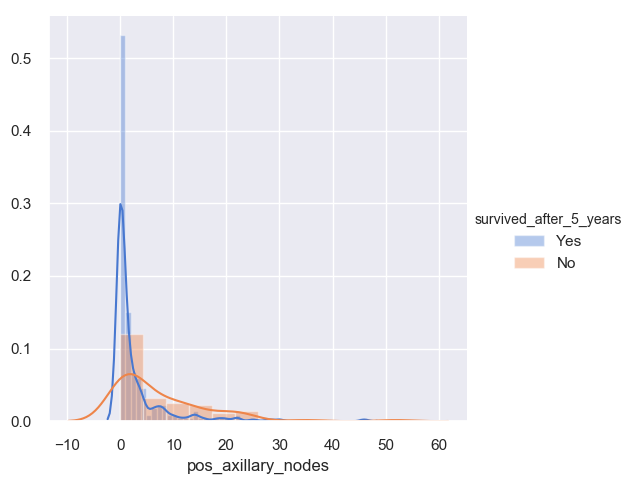

In [26]:
sns.FacetGrid(cancer_df,hue='survived_after_5_years',height = 5).map(sns.distplot,'pos_axillary_nodes').add_legend()
plt.show()

#### Observation

1.   Almost 80% of patients has less than 5 positive axillary nodes.
2.   Patients with no nodes or 1 nodes are more likely to survive.
3.   There are very few chances of survival where there are 25 or more nodes.



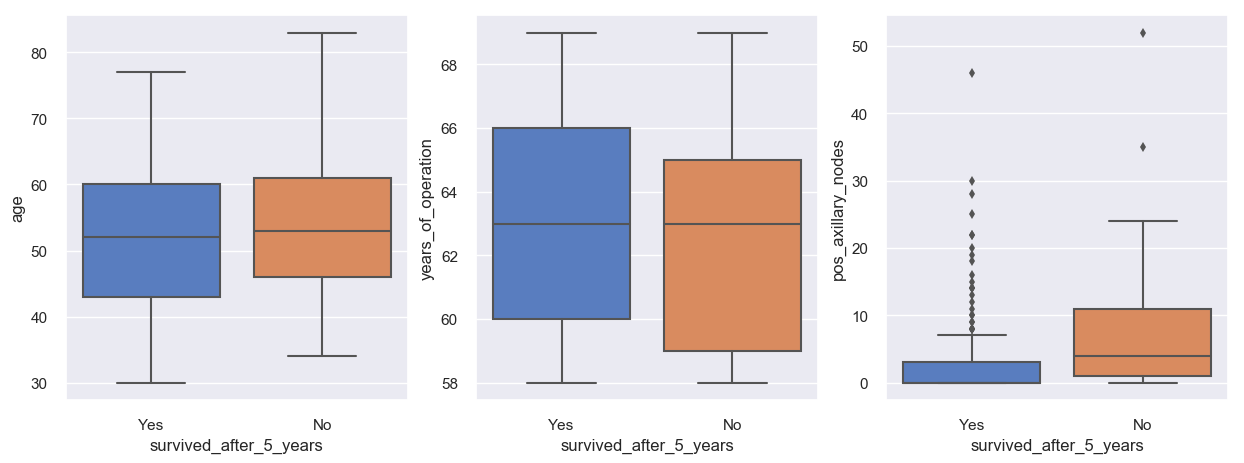

In [27]:
#Box Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='survived_after_5_years',y='age',data=cancer_df,ax=axes[0])
sns.boxplot(x='survived_after_5_years',y='years_of_operation',data=cancer_df,ax=axes[1])
sns.boxplot(x='survived_after_5_years',y='pos_axillary_nodes',data=cancer_df, ax=axes[2])
plt.show()

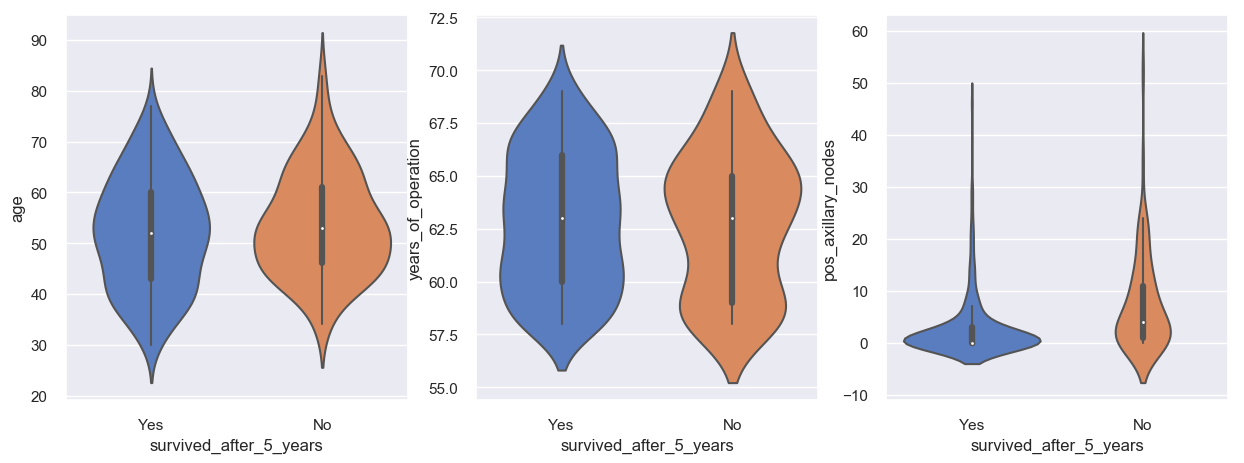

In [28]:
#Violin Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(x='survived_after_5_years',y='age',data=cancer_df,ax=axes[0])
sns.violinplot(x='survived_after_5_years',y='years_of_operation',data=cancer_df,ax=axes[1])
sns.violinplot(x='survived_after_5_years',y='pos_axillary_nodes',data=cancer_df, ax=axes[2])
plt.show()

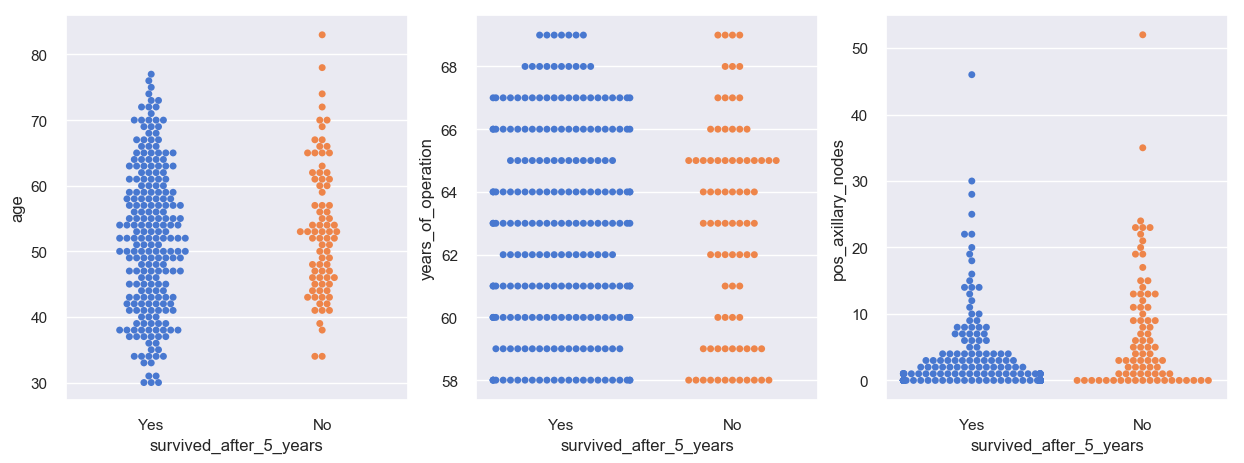

In [29]:
#swarmplot Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.swarmplot(x='survived_after_5_years',y='age',data=cancer_df,ax=axes[0])
sns.swarmplot(x='survived_after_5_years',y='years_of_operation',data=cancer_df,ax=axes[1])
sns.swarmplot(x='survived_after_5_years',y='pos_axillary_nodes',data=cancer_df, ax=axes[2])
plt.show()

#### Observations

1.   Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.
2.   A large percentage of patients who survived had 0 nodes. 
3.   Small percentage of patients who had no positive axillary nodes died within 5 years of operation. So absence of positive axillary nodes cannot always guarantee survival.
3.   There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years.
4.   There were comparatively more people in the age group 45 to 65 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient.




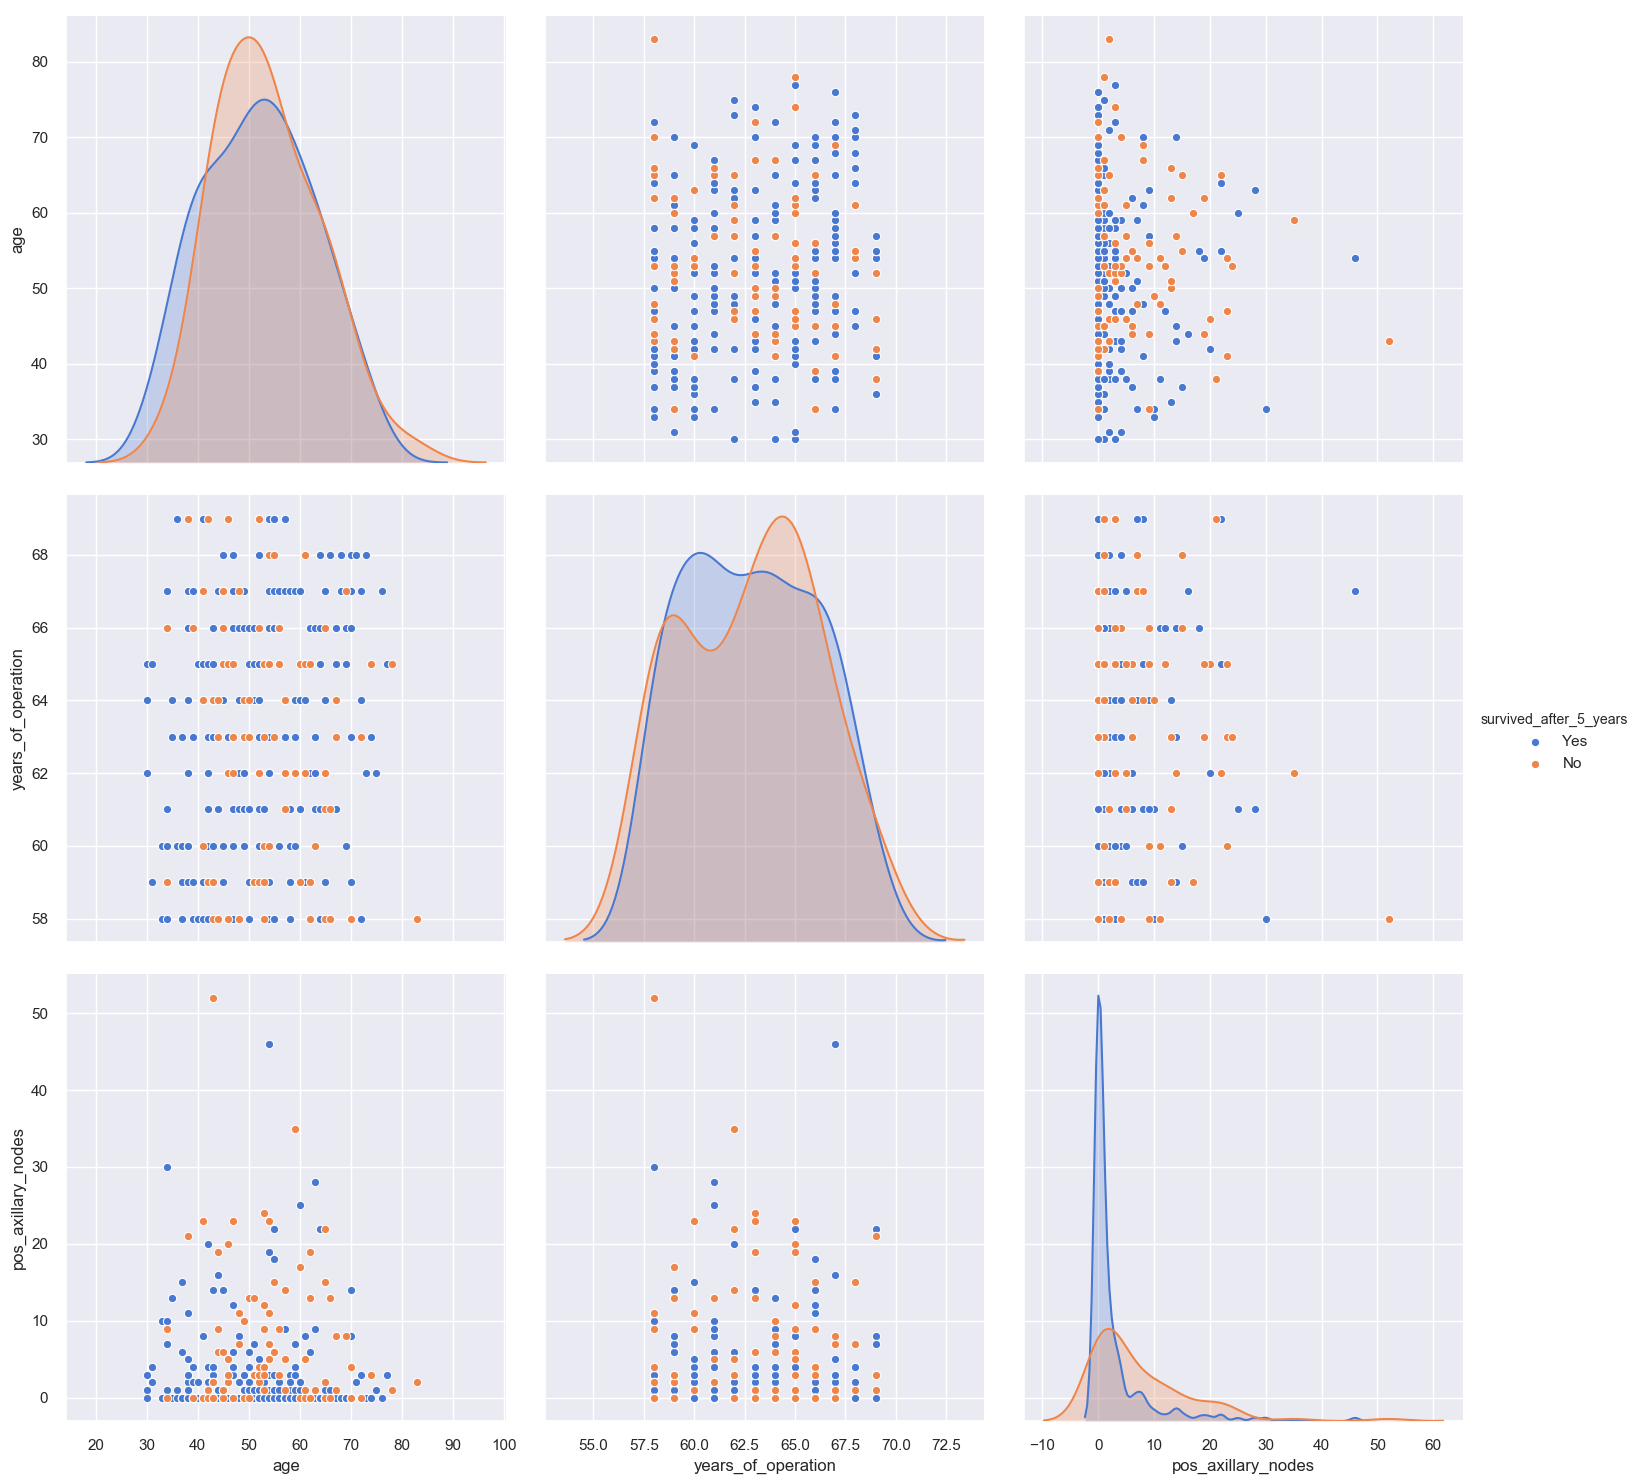

In [30]:
#sns.set_style('whitegrid')
sns.pairplot(cancer_df, hue='survived_after_5_years', height = 5)
plt.show()

#### Observation
    By scattering the data points between years_of_operation and pos_axillary_nodes, we can see the better seperation between the two clases than other scatter plots.

## Conclusion

1.   Patient’s age and operation year alone are not deciding factors for survival. Yet, people less than 35 years have more chance of survival.
1.   Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.
2.   The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.

